2.19.0
Training images: (60000, 28, 28)
Training labels: (60000,)
Test images: (10000, 28, 28)
Test labels: (10000,)


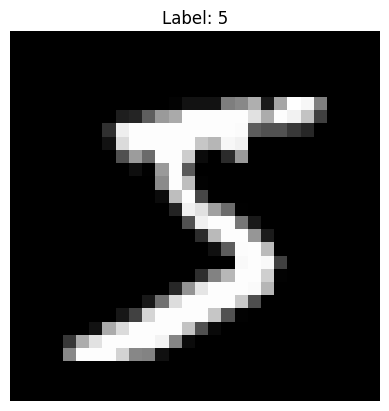

(60000, 28, 28, 1)


In [ ]:
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training images:", x_train.shape)
print("Training labels:", y_train.shape)
print("Test images:", x_test.shape)
print("Test labels:", y_test.shape)

plt.imshow(x_train[0], cmap="gray")
plt.title(f"Label: {y_train[0]}")
plt.axis("off")
plt.show()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape)






In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.1
)




Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 29ms/step - accuracy: 0.9017 - loss: 0.3244 - val_accuracy: 0.9853 - val_loss: 0.0486
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9858 - loss: 0.0454 - val_accuracy: 0.9863 - val_loss: 0.0477
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.9894 - loss: 0.0329 - val_accuracy: 0.9900 - val_loss: 0.0350
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.9928 - loss: 0.0217 - val_accuracy: 0.9907 - val_loss: 0.0325
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.9948 - loss: 0.0153 - val_accuracy: 0.9865 - val_loss: 0.0462


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9832 - loss: 0.0550
Test accuracy: 0.9872999787330627


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted digit: 9
Actual digit: 9


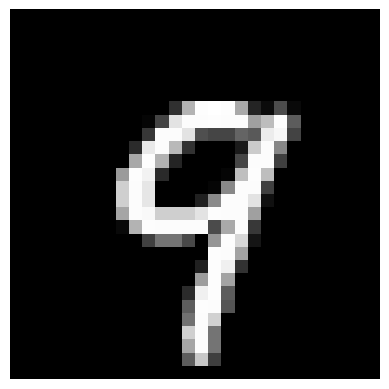

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

index = 12  # change this number to try others

prediction = model.predict(
    x_test[index].reshape(1, 28, 28, 1)
)

print("Predicted digit:", np.argmax(prediction))
print("Actual digit:", y_test[index])

plt.imshow(x_test[index].reshape(28,28), cmap="gray")
plt.axis("off")
plt.show()


In [1]:
model.save("digit_model.h5")



NameError: name 'model' is not defined